<a href="https://colab.research.google.com/github/pancholi-deep/colab-notebooks/blob/main/approximation_using_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Approximation of sin(x)cos(y) function using neural networks (experimenting on different hyperparameters)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
128/128 [==============================] - 1s 2ms/step - loss: 0.3311
Epoch 2/3
128/128 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 3/3
128/128 [==============================] - 0s 2ms/step - loss: 0.2302


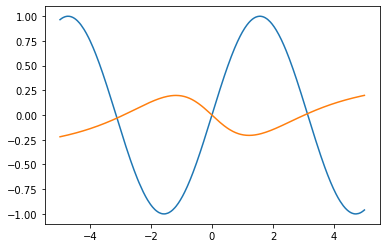

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


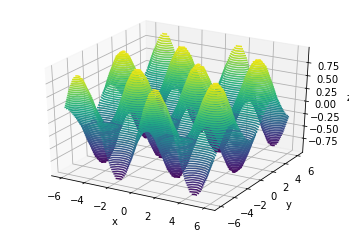

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def data_gen():
    while True:
        x = (np.random.random([1024])-0.5) * 10
        b = (np.random.random([1024])-0.5) * 10 
        y = np.sin(x) * np.cos(b)
        yield (x,y)

regressor = Sequential()
regressor.add(Dense(units=20, activation='tanh', input_dim=1))
regressor.add(Dense(units=20, activation='tanh'))
regressor.add(Dense(units=20, activation='tanh'))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(loss='mse', optimizer='adam')

regressor.fit_generator(data_gen(), epochs=3, steps_per_epoch=128)

x = (np.random.random([1024])-0.5)*10
x = np.sort(x)
y = np.sin(x)

plt.plot(x, y)
plt.plot(x, regressor.predict(x))
plt.show()

def f(x, y):
    return np.sin(x) * np.cos(y)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# fig1 = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, regressor.predict(x,y), 50, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');

Epoch 1/100
157/157 [==============================] - 1s 1ms/step - loss: 0.1906
Epoch 2/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1155
Epoch 3/100
157/157 [==============================] - 0s 925us/step - loss: 0.1149
Epoch 4/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1184
Epoch 5/100
157/157 [==============================] - 0s 939us/step - loss: 0.1146
Epoch 6/100
157/157 [==============================] - 0s 943us/step - loss: 0.1148
Epoch 7/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1130
Epoch 8/100
157/157 [==============================] - 0s 934us/step - loss: 0.1132
Epoch 9/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1118
Epoch 10/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1125
Epoch 11/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1101
Epoch 12/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1091
Epoch

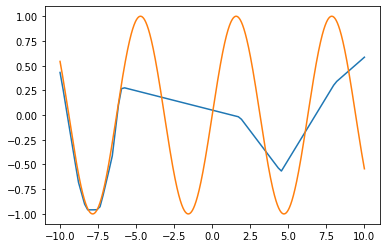

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import random
import numpy
from sklearn.preprocessing import MinMaxScaler

regressor = Sequential()
regressor.add(Dense(units=20, activation='relu', input_dim=1)) 
regressor.add(Dense(units=20, activation='relu')) 
regressor.add(Dense(units=20, activation='relu')) 
regressor.add(Dense(units=1))
regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.fit(X, Y, epochs=100, verbose=1, batch_size=32)

N = 5000
X = numpy.empty((N,))
Y = numpy.empty((N,))

for i in range(N):
    X[i] = random.uniform(-10, 10)
X = numpy.sort(X).reshape(-1, 1)

for i in range(N):
    Y[i] = numpy.sin(X[i])
Y = Y.reshape(-1, 1)

X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
Y = Y_scaler.fit_transform(Y)

regressor.fit(X, Y, epochs=2, verbose=1, batch_size=32)
#regressor.fit(X, Y.reshape(5000,))

x = numpy.mgrid[-10:10:100*1j]
x = x.reshape(-1, 1)
y = numpy.mgrid[-10:10:100*1j]
y = y.reshape(-1, 1)
x = X_scaler.fit_transform(x)

for i in range(len(x)):
    y[i] = regressor.predict(numpy.array([x[i]]))

plt.figure()
plt.plot(X_scaler.inverse_transform(x), Y_scaler.inverse_transform(y))
plt.plot(X_scaler.inverse_transform(X), Y_scaler.inverse_transform(Y))